# Credit Card Approval mit Machine Learning
WWI20DSA; Semester-4;  <br>
Chengyi Hua (8883221); Yassir Knierim (7362794); Jan Rüdt (1737304)

## Projektbeschreibung
Das Kredit-Scoring ist eine weit verbreitete Methode des Risikomanagements im Finanzsektor. Es verwendet persönliche Informationen und Daten, die von Kreditkartenantragstellern bereitgestellt werden, um zukünftige Insolvenzen und Kreditkartendarlehen abzuschätzen. Die Bank ist befugt zu entscheiden, ob sie dem Antragsteller eine Kreditkarte zur Verfügung stellt oder nicht. Kredit-Scores können das Risikoniveau objektiv einschätzen. Ein maschinelles Lernmodell ist erforderlich, um vorherzusagen, ob eine Anwendung in diesem Datensatz ein „guter“ oder „schlechter“ Benutzer ist. Durch unsere Zielvariable oder Definition soll sie vorhersagen, ob der Benutzer als Risikobenutzer eingestuft wird oder nicht.
<br>
<br>

## Ziel:
![](confusionM.png) <br>
In diesem Projekt werden risikobehaftete Kunden als 1 und risikofreie als 0 definiert. Dabei wird es wichtig sein, den Fehler Typ II soweit wie möglich zu vermeiden. In diesem Fall bedeutet Fehler Type II, dass Kunden eine credit card approval bekommen würden, obwohl sie als risikobehaftet erkannt werden sollte.
<br><br>

theorie: Confusions Matrix und Fehler Type I und II <br>
 
Hürden: <br>
-  Das Problem der unausgeglichenen Daten ist ein wesentliches Problem in diesem Projekt.<br>
Mögliche Lösung: Verwenden Sie das Paket PyCaret, um den unausgeglichenen Datensatz zu reparieren
-  Experimente mit verschiedene Modelle. Schnelleres Vorgehen mit __PyCaret__ möglich
-  Down- oder Oversampling

### Definition der Parameter
| Attribut Bezeichnung | Beschreibung | Kommentar |
| ------------ | ----------- | ------- |
|applicant_ID| Kundennummer |Für das Modell nicht relevant |	
|gender|	Geschlecht|Kategorial	|
|owning_car|	Autobesitz	|Kategorial |
|owning_property|	Immobilienbesitz	|Kategorial |
|children_amt|	Anzahl von Kindern|Kategorisch |	
|anual_income|	Jährliches Einkommen|Numerisch |	
|education_level|	Bildungsniveau	|Kategorial |
|marital_status|	Familienstand	|Kategorial |
|housing_type|	Wohnsituation	|Kategorial |
|age|Alter |Numerisch |
|working_years|	Arbeitsdauer in Jahren|Numerisch |	
|owning_phone|	Handybesitz	|Kategorial |
|owning_work_phone|	Arbeitshandybesitz	|Kategorial |
|owning_email|	Emailbesitz	|Kategorial |
|job|Arbeitstitel|Kategorial |
|payment_status|	Status|1: 1–29 Tage überfällig<br> 2: 30–59 Tage überfällig<br> 3: 60–89 Tage überfällig<br> 4: 90–119 Tage überfällig<br> 5: 120–149 Tage überfällig<br> 6: Überfällig oder uneinbringlich, Abschreibungen für mehr als 150 Tage<br> -1: in diesem Monat abbezahlt<br> 0: kein Darlehen für den Monat. Kategorial|
|risk_user|	Ziel|	Risikonutzer sind mit „1“ gekennzeichnet, ansonsten mit „0“. Kategorial|

Tabelle (1)<br>
@Dennis Knierim

In [1]:
categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level','marital_status', 'housing_type', 'job']

## Loading dependencies

In [2]:
from operator import imod
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
import warnings
import pycaret
import math
from collections import Counter
from numpy.random import default_rng
from imblearn.under_sampling import *
import imblearn
from sklearn.model_selection import KFold
from pycaret.classification import *
#import featurewiz as FW
#from lazytransform import LazyTransformer
import sklearn
#from featurewiz import SuloClassifier, print_sulo_accuracy

# --- Libraries Settings ---
#warnings.filterwarnings('ignore')
#plt.rcParams['figure.dpi'] = 100

## Datenanpassung

Thoerie: Warum 

In [3]:
cca =  pd.read_csv('credit_card_approval.csv')
# rough years of employment
cca.DAYS_EMPLOYED = abs(cca.DAYS_EMPLOYED) // 365
# finding out each customers age
cca.DAYS_BIRTH =  abs(cca.DAYS_BIRTH) // 365  
cca.AMT_INCOME_TOTAL = pd.to_numeric(cca.AMT_INCOME_TOTAL)
# dropping unneccessary attributes
cca = cca.drop("FLAG_MOBIL", axis=1)



cca.rename(columns = {'CODE_GENDER':'gender', 
                      'DAYS_BIRTH': 'age',
                      'DAYS_EMPLOYED': 'working_years',
                      'FLAG_OWN_CAR':'owning_car',
                      'FLAG_OWN_REALTY': 'owning_property',
                      'CNT_CHILDREN': 'children_amt',
                      'AMT_INCOME_TOTAL': 'anual_income',
                      'NAME_EDUCATION_TYPE': 'education_level',
                      'NAME_FAMILY_STATUS': 'marital_status',
                      'NAME_HOUSING_TYPE': 'housing_type',
                      'FLAG_WORK_PHONE': 'owning_work_phone',
                      'FLAG_EMAIL': 'owning_email',
                      'FLAG_PHONE': 'owning_phone',
                      'STATUS': 'payment_status',
                      'TARGET': 'risk_user',
                      'JOB': 'job',
                      'ID': 'applicant_ID'
                      }, inplace = True)


cca["owning_car"].replace({'Y' : '1', 'N': '0'}, inplace= True)
cca["owning_property"].replace({'Y' : '1', 'N': '0'}, inplace= True)
cca["risk_user"].replace({'1' : 'Y', '0': 'N'}, inplace= True)
cca["payment_status"].replace({'0' : '1', 
                               '1': '2', 
                               '2': '3', 
                               '3': '4', 
                               '4': '5', 
                               '5': '6', 
                               'C': '-1', 
                               'X': '0'}, inplace= True)
cca.payment_status = [int(i) for i in cca.payment_status ]
cca = cca.sort_values('applicant_ID')



In [4]:
cca.dtypes

applicant_ID           int64
gender                object
owning_car            object
owning_property       object
children_amt          object
anual_income         float64
education_level       object
marital_status        object
housing_type          object
age                    int64
working_years          int64
owning_work_phone      int64
owning_phone           int64
owning_email           int64
job                   object
BEGIN_MONTHS           int64
payment_status         int64
risk_user              int64
dtype: object

In [5]:
def get_count_of(applicant_frame,column,credit_type):
    df = applicant_frame
    values = df[column].value_counts()
    try:
        return values[values.index==credit_type][0]
    except:
        return 0

cca_credit_analysis = cca.copy()
cca_credit_analysis['payment_status'].replace({0:'no_credit',
        -1:'good',
        1:'good',
        2:'bad',
        3:'bad',
        4:'bad',
        5:'bad',
        6:'bad'}, inplace=True)
#test
get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==5008806],'payment_status','good')

14

In [6]:
good_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','good') for i in list(cca.applicant_ID.unique())}
bad_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','bad') for i in list(cca.applicant_ID.unique())}
no_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','no_credit') for i in list(cca.applicant_ID.unique())}

In [7]:
cca['total_good_credit'] = cca.applicant_ID.map(good_mapping)
cca['total_bad_credit'] = cca.applicant_ID.map(bad_mapping)
cca['total_no_credit'] = cca.applicant_ID.map(no_mapping)

In [8]:
# checking for datatype of the different attributes
#print(cca.dtypes)

# getting insides into the attribute contents, Check for na and errors
#columns = []
#for n in cca.columns:
#    columns.append(n)

#for n in columns:  
#    print(n)
#    print(cca[n].unique())
#    for i in cca[n].isna():
#        if i == True:
#            print("AHAAAA")
#    print('\n \n')   
#print(cca.isnull().sum())


In [9]:
cca_t0 = cca[cca.BEGIN_MONTHS==0]
cca_t0

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,working_years,owning_work_phone,owning_phone,owning_email,job,BEGIN_MONTHS,payment_status,risk_user,total_good_credit,total_bad_credit,total_no_credit
15347,5008806,M,1,1,No children,112500.0,Secondary / secondary special,Married,House / apartment,58,3,0,0,0,Security staff,0,-1,0,14,0,16
518288,5008808,F,0,1,No children,270000.0,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,Sales staff,0,1,0,2,0,3
167402,5008810,F,0,1,No children,270000.0,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,Sales staff,0,-1,0,21,0,6
24372,5008811,F,0,1,No children,270000.0,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,Sales staff,0,-1,0,33,0,6
500150,5008815,M,1,1,No children,270000.0,Higher education,Married,House / apartment,46,2,1,1,1,Accountants,0,1,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118006,5150481,F,1,1,1 children,157500.0,Secondary / secondary special,Married,House / apartment,29,4,0,0,0,Core staff,0,0,0,0,0,43
355013,5150483,F,1,1,1 children,157500.0,Secondary / secondary special,Married,House / apartment,29,4,0,0,0,Core staff,0,0,0,0,0,18
534120,5150484,F,1,1,1 children,157500.0,Secondary / secondary special,Married,House / apartment,29,4,0,0,0,Core staff,0,-1,0,13,0,0
39975,5150485,F,1,1,1 children,157500.0,Secondary / secondary special,Married,House / apartment,29,4,0,0,0,Core staff,0,1,0,2,0,0


In [10]:
cca_unique_id = cca_t0.drop_duplicates('applicant_ID')
cca_unique_id.sample(10)

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,working_years,owning_work_phone,owning_phone,owning_email,job,BEGIN_MONTHS,payment_status,risk_user,total_good_credit,total_bad_credit,total_no_credit
357691,5099828,F,0,0,No children,157500.0,Secondary / secondary special,Married,House / apartment,32,4,1,0,0,Sales staff,0,-1,0,37,0,0
359603,5022755,F,0,0,1 children,202500.0,Secondary / secondary special,Separated,House / apartment,29,8,0,0,0,Sales staff,0,-1,0,27,0,1
341121,5079166,M,1,0,No children,202500.0,Secondary / secondary special,Married,With parents,37,3,0,0,0,Laborers,0,-1,0,15,16,12
120921,5053750,F,0,1,1 children,135000.0,Higher education,Married,House / apartment,27,2,0,0,0,Sales staff,0,-1,0,16,0,10
381987,5135654,F,1,1,1 children,225000.0,Higher education,Married,House / apartment,30,3,0,0,0,Laborers,0,-1,0,15,0,0
297731,5041073,F,0,1,No children,67500.0,Secondary / secondary special,Single / not married,House / apartment,49,0,0,0,0,Laborers,0,1,0,44,3,1
166700,5008994,F,1,1,No children,270000.0,Secondary / secondary special,Separated,House / apartment,45,3,1,1,0,Cleaning staff,0,1,0,17,0,3
469103,5092308,M,0,1,No children,270000.0,Secondary / secondary special,Married,House / apartment,51,8,0,1,0,Laborers,0,-1,0,38,0,12
394221,5068978,M,1,0,No children,153000.0,Secondary / secondary special,Single / not married,With parents,29,3,0,0,0,Laborers,0,1,0,21,0,17
247515,5091870,F,0,1,No children,247500.0,Higher education,Married,House / apartment,54,0,0,1,0,Sales staff,0,1,0,10,0,0


## Deskriptive Analyse / Visualisierung 

Die deskriptive Analyse, auch bekannt als deskriptive Analytik oder deskriptive Statistik, ist der Prozess der Verwendung statistischer Techniken zur Beschreibung oder Zusammenfassung einer Reihe von Daten. Als eine der wichtigsten Arten der Datenanalyse ist die deskriptive Analyse beliebt, da sie zugängliche Erkenntnisse aus Daten generieren kann. [1]

Im Gegensatz zu anderen Arten der Datenanalyse versucht die deskriptive Analyse nicht, Vorhersagen über die Zukunft zu treffen. Stattdessen zieht es Erkenntnisse ausschließlich aus vergangenen Daten, indem es sie auf eine Weise manipuliert, die sie aussagekräftiger macht.

@Chengyi Hua

In [11]:
fig = go.Figure([go.Bar(x=['N','Y'], y=[cca_unique_id[cca_unique_id.risk_user==0].count()[0], cca_unique_id[cca_unique_id.risk_user==1].count()[0]])])
fig

In [12]:
def class_count(y):
    counter = Counter(y)
    for k, v in counter.items():
        dist = v / len(y) * 100
        print(f"Class={k}, n={v} ({dist}%)")

class_count(cca_unique_id.risk_user)

Class=0, n=16980 (99.63034676993487%)
Class=1, n=63 (0.3696532300651294%)


Unser Datensatz weist weniger als 1% seltener, aber “interessanter” Ereignisse auf (z. B. User, die als ...). Es ist also ein unausgewogener Datensatz. Die meisten Algorithmen zum maschinellen Lernen funktionieren jedoch nicht gut mit unausgewogenen Datensätzen. 

#### Problem mit unausgeglichenem Datensatz <br>
Auswirkung / Folgen: <br>
- __Eine unausgewogene Klassifizierung__. Es für zu der Entwicklung von Vorhersagemodellen für Klassifizierungsdatensätze, die ein schwerwiegendes Klassenungleichgewicht aufweisen. Die Herausforderung bei der Arbeit mit unausgewogenen Datensätzen besteht darin, dass die meisten maschinellen Lerntechniken die Minderheitsklasse ignorieren und dafür eine schlechte Leistung erbringen, obwohl normalerweise die Leistung der Minderheitsklasse am wichtigsten ist.<br><br>




In [13]:
#extracting applicants not being risk user
non_risk_user = cca_unique_id[cca_unique_id.risk_user == 0]
#not_risk.sample(10)

#extracting applicants being risk user
risk_user = cca_unique_id[cca_unique_id.risk_user == 1]
#risk.sample(10)

In [14]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[cca_unique_id[cca_unique_id.gender=='F'].count()[0], cca_unique_id[cca_unique_id.gender=='M'].count()[0]])])
fig

- fig(1): Verteilung von Männern und Frauen in der Tabelle cca. In der Tabelle sind viel mehr Frauen als Männer aufgelistet.

In [15]:
class_count(cca_unique_id.gender)

Class=M, n=6518 (38.24444053277005%)
Class=F, n=10525 (61.75555946722995%)


In [16]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[risk_user[risk_user.gender=='F'].count()[0], risk_user[risk_user.gender=='M'].count()[0]])])
fig

- fig(2): Verteilung von Männern und Frauen, die als "Risk User" gekennzeichnet wurden. Männliche Risk User sind etwas häufiger als weibliche Risk User in dieser Tabelle.

In [17]:
class_count(risk_user.gender)

Class=M, n=32 (50.79365079365079%)
Class=F, n=31 (49.2063492063492%)


In [18]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[non_risk_user[non_risk_user.gender=='F'].count()[0], non_risk_user[non_risk_user.gender=='M'].count()[0]])])
fig

- fig(3): Verteilung von Männern und Frauen, die als Non-Risk User gekennzeichnet wurden. Man sieht dass es deutlich mehr weibliche Non-Risk User gibt als männliche. 
- Ein männlicher User hat eine höhere Wahrscheinlichkeit in dieser Tabelle als Risk-User gekennzeichnet zu sein.

In [19]:
class_count(non_risk_user.gender)

Class=M, n=6486 (38.197879858657245%)
Class=F, n=10494 (61.802120141342755%)


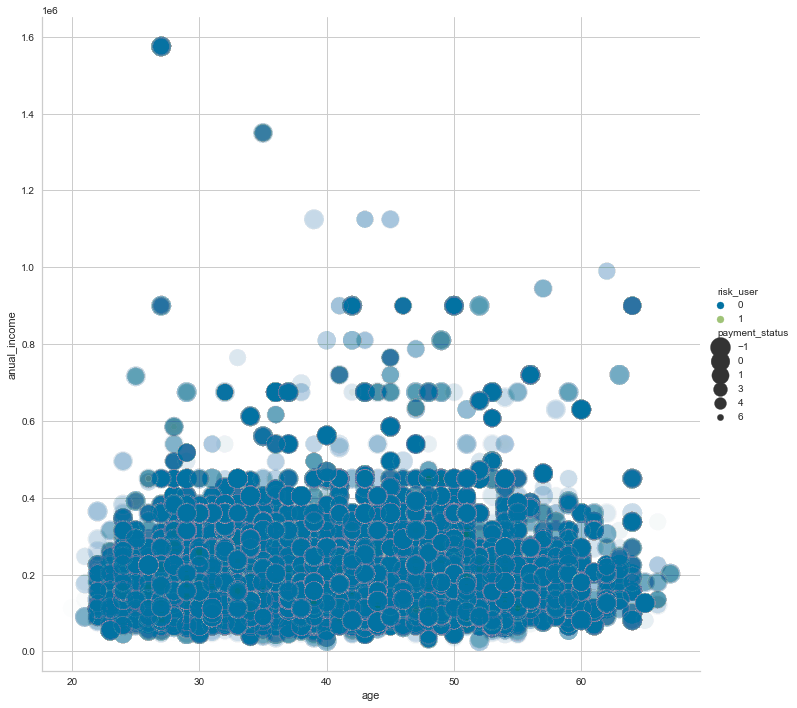

In [20]:
plot_1 = sns.relplot(x='age', y='anual_income', hue='risk_user',size='payment_status',data=cca,
sizes=(400,40),alpha=0.01,height=10)

- fig(4): In dieser Visualisierung versuchen wir eine klare Abtrennung von Risk- und Non-Risk-Unsern darzustellen. Wir plotten dazu die Parameter 'age', 'annual income'  und 'payment status' bei Risk und Non-Risk user. Allerdigns kann keine klare Abtrennung im Scatter-Plot beobachtet werden. Zu sehen ist lediglich, dass die blauen Punkte, die Non-Risk-User darstellen, kleiner sind als die gelben Punkte, die Risk-User darstellen. Man schließt daraus, dass sich lediglich der Parameter 'payment_status' in den beiden Kategorien klar unterscheidet.

@Dennis

In [21]:
y_list=[]
for i in list(risk_user.payment_status.unique()):
    y_list.append(risk_user[risk_user.payment_status==i].count()[0])

fig = go.Figure([go.Bar(x=list(risk_user.payment_status.unique()), 
y=y_list)])
fig

- fig(5): dieser Plot zeigt den 'payment status' aller Risk-User. Es zeichnet sich heraus, dass die meisten Personen in dieser Gruppe einen Zahlungsstatus von 6 haben, also mit ihren Rückzahlungen stark im Verzug sind (siehe Tabelle 1) 

In [22]:
class_count(risk_user.payment_status)

Class=4, n=3 (4.761904761904762%)
Class=6, n=44 (69.84126984126983%)
Class=3, n=12 (19.047619047619047%)
Class=5, n=4 (6.349206349206349%)


In [23]:
y_list=[]
for i in list(non_risk_user.payment_status.unique()):
    y_list.append(non_risk_user[non_risk_user.payment_status==i].count()[0])

fig = go.Figure([go.Bar(x=list(non_risk_user.payment_status.unique()), 
y=y_list)])
fig

- fig(6): Dieser Plot zeigt den Zahlungsstatus aller Non-Risk-User. Sie sind mit ihren Rückzahlungen Pünktlich oder nur leicht im Verzug, was einen starken Kontrast zu den Risk-Usern darstellt.

In [24]:
class_count(non_risk_user.payment_status)

Class=-1, n=8890 (52.35571260306242%)
Class=1, n=4783 (28.16843345111896%)
Class=0, n=3138 (18.480565371024735%)
Class=2, n=169 (0.9952885747938751%)


In [25]:
y_list=[]
for i in list(risk_user.housing_type.unique()):
    y_list.append(risk_user[risk_user.housing_type==i].count()[0])

fig = go.Figure([go.Bar(x=list(risk_user.housing_type.unique()), 
y=y_list)])
fig


In [26]:
y_list=[]
for i in list(non_risk_user.housing_type.unique()):
    y_list.append(non_risk_user[non_risk_user.housing_type==i].count()[0])

fig = go.Figure([go.Bar(x=list(non_risk_user.housing_type.unique()), 
y=y_list)])
fig


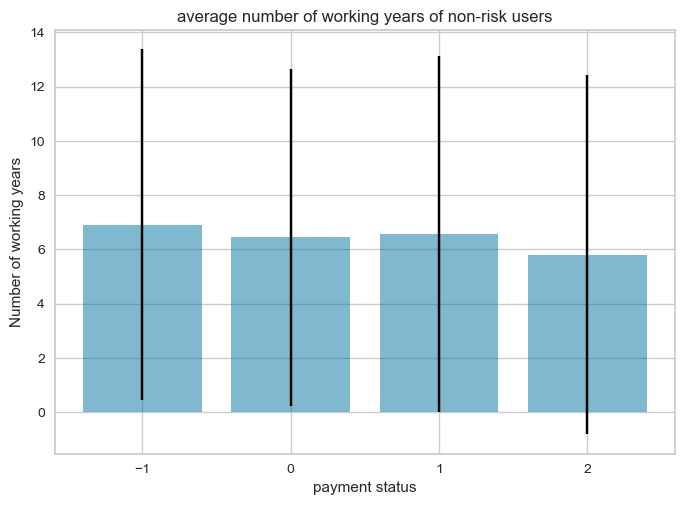

In [27]:
y=[]
error = []
for i in list(non_risk_user.payment_status.unique()):
    df = non_risk_user[non_risk_user.payment_status==i]
    m = df.working_years.mean()
    y.append(m)
    dev = np.std(df.working_years)
    error.append(dev)

fig, ax = plt.subplots()
ax.bar(list(non_risk_user.payment_status.unique()), y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(list(non_risk_user.payment_status.unique()))
ax.yaxis.grid(True)
ax.set_ylabel('Number of working years')
ax.set_xlabel('payment status')
ax.set_title('average number of working years of non-risk users')

# Save the figure and show
plt.show()

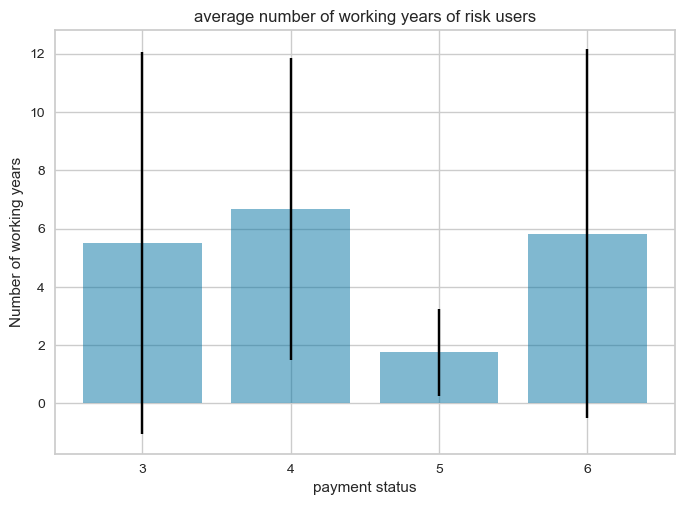

In [28]:
y=[]
error = []
for i in list(risk_user.payment_status.unique()):
    df = risk_user[risk_user.payment_status==i]
    m = df.working_years.mean()
    y.append(m)
    dev = np.std(df.working_years)
    error.append(dev)

fig, ax = plt.subplots()
ax.bar(list(risk_user.payment_status.unique()), y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(list(risk_user.payment_status.unique()))
ax.yaxis.grid(True)
ax.set_ylabel('Number of working years')
ax.set_xlabel('payment status')
ax.set_title('average number of working years of risk users')

# Save the figure and show
plt.show()


Mögliche Lösung für unbalanced Dataset: <br>
- __over sampling__: Ein Ansatz zur Behandlung unausgewogener Datensätze besteht darin, die Minderheitsklasse zu "oversample". Der einfachste Ansatz besteht darin, Beispiele in der Minderheitsklasse zu duplizieren, diese Beispiele gibt dem Modell keine neuen Informationen. Es werden neue Beispiele aus den bestehenden Beispielen synthetisiert. Dies ist eine Art Datenvermehrung für die Minderheitsschicht und wird als Synthetic Minority Oversampling Technique, kurz SMOTE, bezeichnet. <br> <br>
Diese Möglichkeit ist in der PyCarat Bikliothek integriert. Mit __fix_imbalance is True__
, wird der unausgewogene Datensatz angepasst. Auf __Default__ ist der __fit_resample__ Methode auf SMOTE festgelegt.<br> <br>

- __under ampling__: Under-Sampling gleicht den Datensatz aus, indem die Größe der reichlich vorhandenen Klasse reduziert wird. Diese Methode wird verwendet, wenn die Datenmenge ausreicht. Indem alle Stichproben in der seltenen Klasse gehalten werden und zufällig eine gleiche Anzahl von Stichproben in der reichlich vorhandenen Klasse ausgewählt wird, kann ein ausgewogener neuer Datensatz zur weiteren Modellierung abgerufen werden<br><br>
@Chengyi Hua<br> 

## Testdatensatz von 10%
Es wir einen zufälligen Test-Datensatz von 10 Prozent gesampelt. 

---- Theorie.

### Notes:
- Increaded training data to 90% to favoure the training of the model
- Experimenting with different models and different oversamplinng methods
- - so far : random oversampler, smote

In [29]:
cca_for_test = cca_unique_id.drop(['BEGIN_MONTHS','payment_status'], axis= 1)
training_data = cca_for_test.sample(frac=0.9, random_state=25)
testing_data = cca_for_test.drop(training_data.index)

## Versuche mit PyCarat <br>

### Gründe für die Benutzung von PyCaret, ein Open-scource ML Bibliothek.

PyCaret ist eine Open-Source-Low-Code-Bibliothek für maschinelles Lernen in Python, die Arbeitsabläufe für maschinelles Lernen automatisiert. Es ist ein End-to-End-Tool für maschinelles Lernen und Modellmanagement, das den Experimentzyklus exponentiell beschleunigt und sie produktiver macht.
<br>
<br>
Verglichen mit den anderen Open-Source-Bibliotheken für maschinelles Lernen ist PyCaret eine alternative Low-Code-Bibliothek, mit der Hunderte von Codezeilen durch nur wenige Zeilen ersetzt werden können. Dies macht Experimente exponentiell schnell und effizient. PyCaret ist im Wesentlichen ein Python-Wrapper um mehrere Bibliotheken und Frameworks für maschinelles Lernen wie scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray und einige mehr.
<br>
<br>
Da immer mehr Unternehmen ihren Fokus auf maschinelles Lernen verlagern, um schwierige Probleme anzugehen, werden von Datenwissenschaftlern erwartet, dass sie schneller Ergebnisse liefern können. Dies hat die Nachfrage nach der Automatisierung wichtiger Phasen in Data-Science-Projekten erhöht, sodass sich Data Scientists auf das eigentliche Problem konzentrieren können, anstatt Hunderte von Codezeilen zu schreiben, um das optimale Modell zu identifizieren.

@Chengyi Hua

theorie tratifiedkfold und kfold unterscheid und verwendung.  im Bezug auf Pycarat

theorie: Cross validierung, weil es hier verwendet wird

# Oversampling mit Pycaret

theorie: SMOTE

## 1. Random Oversampler

In [98]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.RandomOverSampler(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_random = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_random[0])
evaluate_model(best_model_with_oversampling_random[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9966,0.9514,0.0733,0.2000,0.1071,0.1065,0.1202,1.2220
et,Extra Trees Classifier,0.9965,0.9270,0.0567,0.2333,0.0869,0.0862,0.1106,1.3100
lightgbm,Light Gradient Boosting Machine,0.9962,0.9359,0.2783,0.4233,0.3194,0.3176,0.3326,0.3990
dt,Decision Tree Classifier,0.9950,0.6454,0.2933,0.3233,0.2686,0.2663,0.2850,0.1310
knn,K Neighbors Classifier,0.9949,0.5785,0.1608,0.2533,0.1732,0.1709,0.1851,1.8050
gbc,Gradient Boosting Classifier,0.9901,0.9715,0.5725,0.1840,0.2736,0.2700,0.3171,3.2320
ada,Ada Boost Classifier,0.9856,0.9746,0.5925,0.1309,0.2121,0.2079,0.2718,1.0530
nb,Naive Bayes,0.9716,0.9461,0.8317,0.0898,0.1589,0.1539,0.2599,0.0670
lr,Logistic Regression,0.9418,0.9874,0.9467,0.0820,0.1469,0.1417,0.2560,0.6040
ridge,Ridge Classifier,0.9191,0.0000,0.6358,0.0236,0.0452,0.0390,0.1071,0.1100


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3532, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [102]:
print(best_model_with_oversampling_random[2])
evaluate_model(best_model_with_oversampling_random[2])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3532, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

exclude dummy algorithm because of bad results and because it doesn't support feature importance

## 2. SMOTE

In [100]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_smote = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_smote[0])
evaluate_model(best_model_with_oversampling_smote[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9965,0.8797,0.1358,0.6333,0.2165,nan,0.2856,1.3510
rf,Random Forest Classifier,0.9963,0.8358,0.1191,0.4667,0.1865,nan,0.2315,1.7360
lightgbm,Light Gradient Boosting Machine,0.9960,0.8935,0.2983,0.5167,0.3472,0.3455,0.3723,0.6630
dt,Decision Tree Classifier,0.9938,0.6253,0.3540,0.2804,0.3056,0.3029,0.3086,0.6340
ada,Ada Boost Classifier,0.9930,0.8906,0.3907,0.2834,0.3034,0.3005,0.3164,1.8540
gbc,Gradient Boosting Classifier,0.9930,0.8808,0.4102,0.2462,0.2971,0.2941,0.3088,7.9790
knn,K Neighbors Classifier,0.9851,0.6367,0.2001,0.0788,0.1108,0.1059,0.1184,0.6380
ridge,Ridge Classifier,0.9461,0.0000,0.4812,0.0404,0.0740,0.0675,0.1280,0.1080
lda,Linear Discriminant Analysis,0.9461,0.8026,0.4812,0.0404,0.0740,0.0675,0.1280,0.3720
nb,Naive Bayes,0.8947,0.8418,0.8032,0.0310,0.0595,0.0524,0.1432,0.0770


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2068, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [103]:
print(best_model_with_oversampling_smote[2])
evaluate_model(best_model_with_oversampling_smote[2])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2068, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2.ADASYNC

In [105]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.ADASYN(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_adasync = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_adasync[0])
evaluate_model(best_model_with_oversampling_adasync[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9966,0.9571,0.0710,0.3000,0.1127,0.1121,0.1434,1.7950
et,Extra Trees Classifier,0.9963,0.9848,0.0710,0.2333,0.1057,0.1049,0.1250,1.2170
lightgbm,Light Gradient Boosting Machine,0.9960,0.9924,0.2843,0.3700,0.3056,0.3038,0.3142,0.5530
dt,Decision Tree Classifier,0.9944,0.6314,0.2660,0.2594,0.2456,0.2430,0.2510,0.7440
gbc,Gradient Boosting Classifier,0.9940,0.9855,0.6112,0.3313,0.3882,0.3857,0.4217,8.0450
ada,Ada Boost Classifier,0.9923,0.9897,0.3726,0.2009,0.2446,0.2414,0.2606,1.9610
knn,K Neighbors Classifier,0.9857,0.6678,0.3019,0.0805,0.1176,0.1130,0.1426,0.7230
ridge,Ridge Classifier,0.9512,0.0000,0.6945,0.0486,0.0898,0.0838,0.1696,0.2030
lda,Linear Discriminant Analysis,0.9512,0.9476,0.6945,0.0486,0.0898,0.0838,0.1696,0.4210
nb,Naive Bayes,0.9042,0.9226,0.8074,0.0355,0.0672,0.0609,0.1528,0.1330


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=336, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [109]:
print(best_model_with_oversampling_adasync[4])
evaluate_model(best_model_with_oversampling_adasync[4])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=336, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 3.Borderline SMOTE

In [110]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.BorderlineSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_bsmote = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_bsmote[0])
evaluate_model(best_model_with_oversampling_bsmote[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9967,0.9676,0.0292,0.2000,0.0508,0.0505,0.0758,1.7990
et,Extra Trees Classifier,0.9967,0.9194,0.0292,0.2000,0.0508,0.0504,0.0758,1.1380
lightgbm,Light Gradient Boosting Machine,0.9963,0.9899,0.2317,0.3767,0.2718,0.2701,0.2856,0.5040
ada,Ada Boost Classifier,0.9957,0.9693,0.4600,0.4164,0.4192,0.4171,0.4264,2.0280
gbc,Gradient Boosting Classifier,0.9955,0.9865,0.3442,0.2929,0.2787,0.2768,0.2953,8.0280
dt,Decision Tree Classifier,0.9941,0.5937,0.1908,0.1867,0.1767,0.1739,0.1797,0.5360
knn,K Neighbors Classifier,0.9917,0.6553,0.2142,0.1015,0.1257,0.1222,0.1366,0.7220
lr,Logistic Regression,0.9715,0.9520,0.7508,0.1190,0.1946,0.1902,0.2768,0.6680
ridge,Ridge Classifier,0.9390,0.0000,0.3875,0.0255,0.0471,0.0412,0.0853,0.1670
lda,Linear Discriminant Analysis,0.9390,0.7893,0.3875,0.0255,0.0471,0.0412,0.0853,0.3790


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3281, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [113]:
print(best_model_with_oversampling_bsmote[7])
evaluate_model(best_model_with_oversampling_bsmote[7])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3281, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 4.SVMSMOTE

In [116]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SVMSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_kmeans = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_kmeans[0])
evaluate_model(best_model_with_oversampling_kmeans[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9971,0.9440,0.1083,0.3500,0.1571,0.1567,0.1873,1.3890
et,Extra Trees Classifier,0.9970,0.9188,0.1083,0.3500,0.1571,0.1566,0.1872,1.6190
lightgbm,Light Gradient Boosting Machine,0.9963,0.9655,0.2238,0.4000,0.2660,0.2643,0.2845,1.0890
gbc,Gradient Boosting Classifier,0.9960,0.9880,0.2476,0.3045,0.2545,0.2527,0.2629,5.6980
ada,Ada Boost Classifier,0.9959,0.9867,0.3131,0.3125,0.3046,0.3027,0.3066,1.4220
dt,Decision Tree Classifier,0.9949,0.6170,0.2369,0.2283,0.2203,0.2182,0.2238,0.4120
knn,K Neighbors Classifier,0.9917,0.6004,0.0952,0.0458,0.0614,0.0579,0.0620,1.6220
lr,Logistic Regression,0.9901,0.9742,0.7714,0.2051,0.3121,0.3090,0.3834,0.5790
ridge,Ridge Classifier,0.9788,0.0000,0.2952,0.0722,0.0945,0.0902,0.1192,0.2960
lda,Linear Discriminant Analysis,0.9782,0.8571,0.2952,0.0657,0.0900,0.0856,0.1145,0.5330


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4126, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4126, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

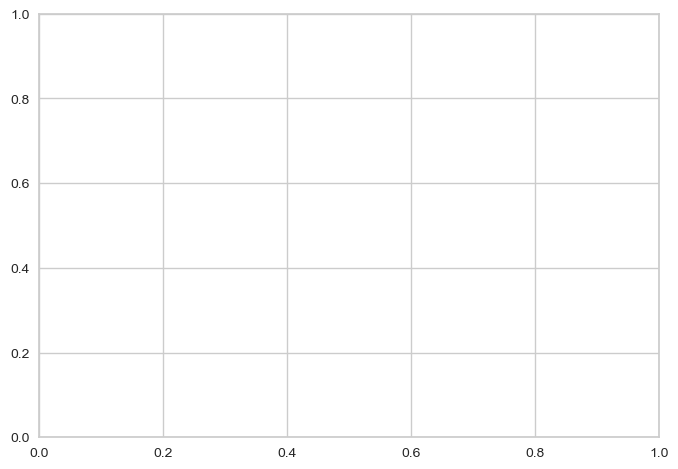

In [119]:
print(best_model_with_oversampling_kmeans[7])
evaluate_model(best_model_with_oversampling_kmeans[7])

## 4.1 logistic Regression with SVMSMOTE over_sampling

In [71]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SVMSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_svm_025 = compare_models(include= ['lr'])
print(best_model_with_oversampling_svm_025)
evaluate_model(best_model_with_oversampling_svm_025)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9826,0.9708,0.7421,0.1584,0.2450,0.2411,0.3175,0.5110


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4599, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.9984,1.0000,0.4444,0.6154,0.6136,0.6653
1,0.9870,0.9951,1.0000,0.0588,0.1111,0.1097,0.2409
2,0.9910,0.9362,0.5000,0.1818,0.2667,0.2631,0.2979
3,0.9829,0.9854,0.5714,0.1818,0.2759,0.2695,0.3160
4,0.9845,0.9926,0.7500,0.1429,0.2400,0.2358,0.3232
5,0.9886,0.9913,0.6000,0.2000,0.3000,0.2957,0.3421
6,0.9756,0.9793,0.6667,0.0645,0.1176,0.1137,0.2023
7,0.9837,0.9951,0.8333,0.2083,0.3333,0.3281,0.4119
8,0.9658,0.8357,0.5000,0.0476,0.0870,0.0815,0.1465


In [73]:
tuned_lr = tune_model(lr, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9943,0.9982,0.7500,0.3333,0.4615,0.4591,0.4977
1,0.9870,0.9951,1.0000,0.0588,0.1111,0.1097,0.2409
2,0.9910,0.9362,0.5000,0.1818,0.2667,0.2631,0.2979
3,0.9829,0.9854,0.5714,0.1818,0.2759,0.2695,0.3160
4,0.9845,0.9926,0.7500,0.1429,0.2400,0.2358,0.3232
5,0.9886,0.9918,0.6000,0.2000,0.3000,0.2957,0.3421
6,0.9764,0.8200,0.6667,0.0667,0.1212,0.1173,0.2059
7,0.9837,0.9945,0.8333,0.2083,0.3333,0.3281,0.4119
8,0.9658,0.8357,0.5000,0.0476,0.0870,0.0815,0.1465


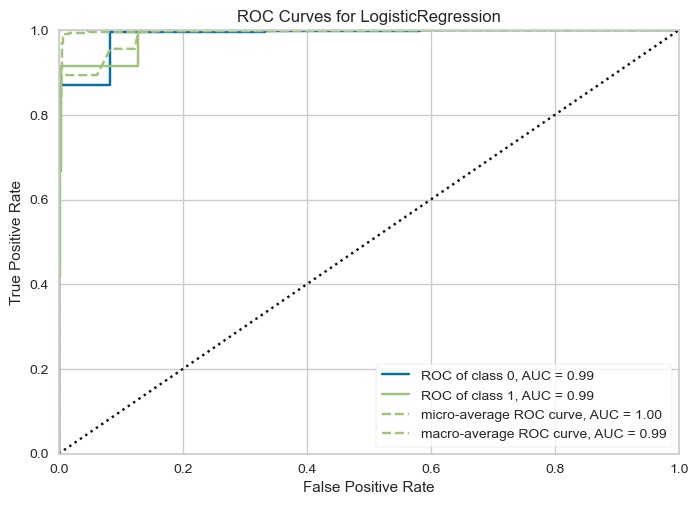

In [74]:
plot_model(tuned_lr,'auc')

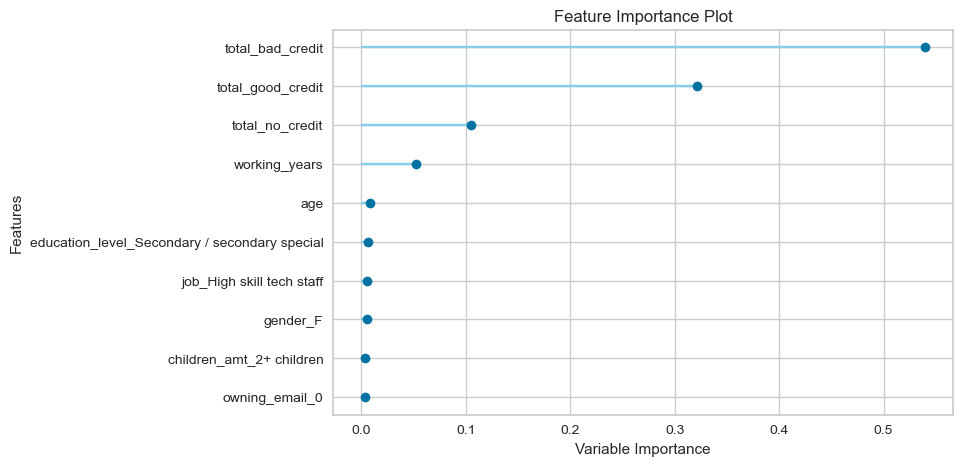

In [75]:
plot_model(tuned_lr, 'feature')

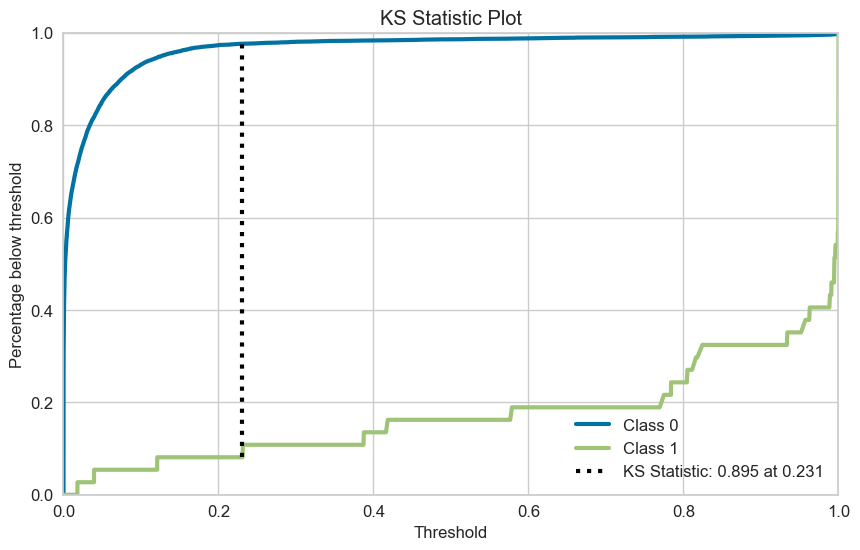

In [190]:
plot_model(tuned_lr,'ks')

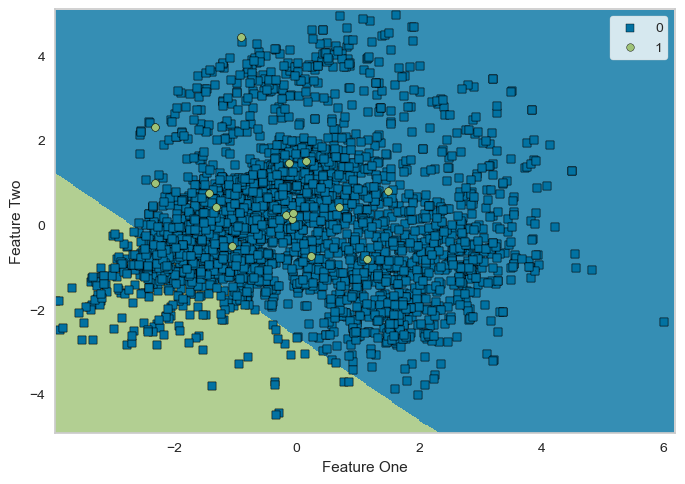

In [191]:
plot_model(tuned_lr, 'boundary')

In [195]:
preddf = predict_model(tuned_lr, data=testing_data, raw_score=True, probability_threshold=0.4)
preddf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9865,0.9948,0.9091,0.3125,0.4651,0.4599,0.5287


,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
149282,5008842,M,0,1,1 children,405000.0,Higher education,Married,House / apartment,32,...,0,0,Managers,0,9,0,0,0,0.9741,0.0259
241284,5008858,F,1,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,43,...,0,0,Laborers,0,11,0,0,0,0.9882,0.0118
373341,5008874,F,0,1,2+ children,126000.0,Higher education,Married,House / apartment,34,...,0,1,Managers,0,46,0,0,0,1.0000,0.0000
284401,5008933,F,0,1,No children,297000.0,Secondary / secondary special,Single / not married,Rented apartment,42,...,0,0,Laborers,0,6,0,0,0,0.9630,0.0370
20411,5008943,F,0,0,No children,157500.0,Higher education,Married,House / apartment,37,...,1,0,High skill tech staff,0,0,0,15,0,0.9977,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44266,5150330,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,6,0,0,0,0.9367,0.0633
194565,5150332,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,20,1,0,0,0.9924,0.0076
381755,5150356,F,0,1,No children,175500.0,Higher education,Married,House / apartment,41,...,1,0,Managers,0,18,0,1,0,0.9980,0.0020
203333,5150389,F,1,1,1 children,315000.0,Secondary / secondary special,Married,Municipal apartment,44,...,0,0,Medicine staff,0,9,0,18,0,0.9999,0.0001


In [196]:
wrong_pred_df = preddf[preddf.risk_user!=preddf.Label]
wrong_pred_df

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
419518,5009908,M,1,0,No children,202500.0,Secondary / secondary special,Married,House / apartment,52,...,0,0,Drivers,0,4,3,1,1,0.5696,0.4304
251452,5023623,F,0,0,2+ children,180000.0,Incomplete higher,Married,House / apartment,37,...,1,0,Sales staff,0,11,4,0,1,0.4886,0.5114
297590,5023963,M,0,1,2+ children,90000.0,Secondary / secondary special,Married,House / apartment,34,...,0,0,Core staff,0,5,19,24,1,0.0000,1.0000
89678,5024448,M,1,1,No children,180000.0,Secondary / secondary special,Married,House / apartment,34,...,1,0,Managers,0,38,11,0,1,0.1978,0.8022
385715,5024472,F,0,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,27,...,0,0,Medicine staff,0,17,5,0,1,0.4612,0.5388
32714,5024564,F,0,0,No children,270000.0,Secondary / secondary special,Single / not married,House / apartment,32,...,1,1,High skill tech staff,0,19,7,0,1,0.1578,0.8422
61729,5028548,M,1,0,1 children,292500.0,Secondary / secondary special,Separated,House / apartment,34,...,1,0,Laborers,0,16,5,0,1,0.4595,0.5405
17337,5033886,M,0,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,24,...,0,0,Low-skill Laborers,0,3,6,1,1,0.0114,0.9886
375110,5046114,M,0,0,No children,126000.0,Higher education,Single / not married,House / apartment,34,...,1,0,Core staff,0,7,3,0,1,0.4504,0.5496
446924,5047662,F,0,1,1 children,67500.0,Secondary / secondary special,Married,House / apartment,51,...,0,0,Accountants,0,6,18,11,1,0.0000,1.0000


In [197]:
wrong_pred_df[wrong_pred_df.Label==0]

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.7047,0.2953


Theorie: Recall, Precision, f1

# Downsampling mit Pycaret




thoerie: Undersampling Methode: Nearmiss

## 1.Random undersampler

In [199]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.RandomUnderSampler() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,735
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [201]:
best_model_with_downsampling_random = compare_models(exclude = ['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9503,0.9869,0.9300,0.0610,0.1124,0.1071,0.2207,0.5880
dt,Decision Tree Classifier,0.9465,0.9731,1.0000,0.0599,0.1112,0.1058,0.2277,0.0500
gbc,Gradient Boosting Classifier,0.9447,0.9741,0.9300,0.0594,0.1089,0.1036,0.2140,0.1670
ada,Ada Boost Classifier,0.9446,0.9784,0.9500,0.0568,0.1054,0.1000,0.2148,0.1540
lightgbm,Light Gradient Boosting Machine,0.9421,0.9815,0.9350,0.0507,0.0947,0.0892,0.2013,0.1110
nb,Naive Bayes,0.9147,0.9319,0.8217,0.0320,0.0603,0.0544,0.1424,0.0420
lr,Logistic Regression,0.8513,0.9121,0.9175,0.0478,0.0896,0.0839,0.1856,0.1110
et,Extra Trees Classifier,0.8410,0.9123,0.7883,0.0168,0.0326,0.0263,0.0949,0.7760
ridge,Ridge Classifier,0.7857,0.0000,0.7050,0.0110,0.0215,0.0151,0.0662,0.0480
lda,Linear Discriminant Analysis,0.7149,0.7595,0.7050,0.0079,0.0156,0.0091,0.0501,0.0770


In [209]:
evaluate_model(best_model_with_downsampling_random[1])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2.Condensed Nearest Neighbors

In [30]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.CondensedNearestNeighbour() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,7826
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best_model_with_downsampling_Condensed = compare_models(include=['lr'], n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9959,0.8885,0.5175,0.3571,0.3949,0.3932,0.4130,53.8590


In [33]:
evaluate_model(best_model_with_downsampling_Condensed)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 3.ALLKNN

In [39]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.AllKNN() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,4199
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
best_model_with_downsampling_ALLKNN = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9968,0.0000,0.1208,0.3000,0.1579,0.1577,0.1795,1.7170
knn,K Neighbors Classifier,0.9967,0.6337,0.1108,0.5000,0.1789,0.1783,0.2320,2.1630
rf,Random Forest Classifier,0.9967,0.9504,0.0908,0.3500,0.1389,0.1385,0.1728,2.4670
et,Extra Trees Classifier,0.9967,0.9461,0.1408,0.3750,0.1806,0.1801,0.2123,2.4590
lr,Logistic Regression,0.9966,0.9033,0.2783,0.4083,0.3083,0.3071,0.3233,1.9750
svm,SVM - Linear Kernel,0.9964,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7990
lightgbm,Light Gradient Boosting Machine,0.9963,0.9631,0.4058,0.4533,0.4023,0.4007,0.4138,1.8920
ada,Ada Boost Classifier,0.9959,0.9616,0.3492,0.4500,0.3722,0.3703,0.3831,2.1710
gbc,Gradient Boosting Classifier,0.9959,0.9305,0.2333,0.3167,0.2576,0.2560,0.2642,3.4590
dt,Decision Tree Classifier,0.9952,0.7194,0.4417,0.3585,0.3762,0.3740,0.3854,1.6490


In [57]:
evaluate_model(best_model_with_downsampling_ALLKNN[-2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 4.Instance Hardness Threshold

In [44]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.InstanceHardnessThreshold() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,3386
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
best_model_with_downsampling_Instance = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9970,0.9757,0.2360,0.4500,0.2846,0.2838,0.3092,4.9760
ridge,Ridge Classifier,0.9969,0.0000,0.2776,0.4917,0.3333,0.3322,0.3543,3.0110
svm,SVM - Linear Kernel,0.9967,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.1370
knn,K Neighbors Classifier,0.9966,0.6835,0.0000,0.0000,0.0000,-0.0001,-0.0002,4.6380
rf,Random Forest Classifier,0.9957,0.9041,0.3002,0.3021,0.2792,0.2773,0.2877,3.6900
lr,Logistic Regression,0.9932,0.9263,0.4800,0.2210,0.2900,0.2875,0.3144,3.1660
nb,Naive Bayes,0.9931,0.9591,0.3371,0.1690,0.2188,0.2158,0.2318,2.9660
ada,Ada Boost Classifier,0.9918,0.9922,0.6619,0.2380,0.3362,0.3332,0.3840,3.1630
gbc,Gradient Boosting Classifier,0.9912,0.9919,0.6679,0.2235,0.3234,0.3203,0.3746,4.0960
lightgbm,Light Gradient Boosting Machine,0.9906,0.9093,0.6240,0.2036,0.2916,0.2883,0.3415,3.0270


In [58]:
evaluate_model(best_model_with_downsampling_Instance[-6])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 5.NearMiss

In [51]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.NearMiss() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,7277
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_model_with_downsampling_NM = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9544,0.8324,0.8067,0.0523,0.0964,0.0916,0.1897,0.0760
lightgbm,Light Gradient Boosting Machine,0.9538,0.8775,0.8433,0.0613,0.1112,0.1067,0.2073,0.1670
gbc,Gradient Boosting Classifier,0.7429,0.8531,0.8433,0.0187,0.0360,0.0304,0.0984,0.1410
ada,Ada Boost Classifier,0.5299,0.7655,0.8600,0.0095,0.0187,0.0129,0.0603,0.1640
rf,Random Forest Classifier,0.4431,0.8333,0.8633,0.0049,0.0097,0.0039,0.0374,0.5250
ridge,Ridge Classifier,0.4087,0.0000,0.7224,0.0038,0.0076,0.0018,0.0197,0.1100
lr,Logistic Regression,0.3978,0.7034,0.8057,0.0128,0.0245,0.0189,0.0561,0.1140
lda,Linear Discriminant Analysis,0.3967,0.4503,0.4729,0.0027,0.0053,-0.0005,-0.0061,0.1140
et,Extra Trees Classifier,0.3122,0.6729,0.8667,0.0041,0.0081,0.0023,0.0282,0.5340
svm,SVM - Linear Kernel,0.3008,0.0000,0.6000,0.0019,0.0037,0.0000,0.0000,0.1050


## 5.Neighbourhood Cleaning Rule

In [55]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.NeighbourhoodCleaningRule() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,1219
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
best_model_with_downsampling_NCR = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9971,0.8617,0.2612,0.4000,0.3088,0.3079,0.3185,1.1480
rf,Random Forest Classifier,0.9971,0.9581,0.1701,0.5000,0.2389,0.2385,0.2787,1.7210
et,Extra Trees Classifier,0.9971,0.9548,0.2151,0.4967,0.2721,0.2715,0.3076,1.7700
ridge,Ridge Classifier,0.9969,0.0000,0.1001,0.4000,0.1544,0.1540,0.1938,0.9590
ada,Ada Boost Classifier,0.9967,0.9579,0.3619,0.6333,0.4350,0.4335,0.4629,1.4420
knn,K Neighbors Classifier,0.9966,0.6540,0.0375,0.1500,0.0556,0.0553,0.0705,1.2390
lightgbm,Light Gradient Boosting Machine,0.9966,0.8729,0.3385,0.5333,0.3758,0.3743,0.3998,1.2320
svm,SVM - Linear Kernel,0.9965,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0370
gbc,Gradient Boosting Classifier,0.9960,0.8761,0.3586,0.4062,0.3573,0.3559,0.3678,2.6070
dt,Decision Tree Classifier,0.9959,0.6757,0.3535,0.3697,0.3329,0.3311,0.3449,0.8920


## Training model with logistic regression and condensed nearest neighbour

In [61]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.CondensedNearestNeighbour() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)


,Description,Value
0,session_id,3282
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
down_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9988,1.0000,0.2500,0.4000,0.3984,0.4988
1,0.9984,0.9980,0.5000,0.5000,0.5000,0.4992,0.4992
2,0.9976,0.8792,0.4000,1.0000,0.5714,0.5704,0.6317
3,0.9959,0.9780,0.5714,0.6667,0.6154,0.6133,0.6152
4,0.9959,0.9959,0.0000,0.0000,0.0000,-0.0013,-0.0016
5,0.9967,0.9177,0.8000,0.5714,0.6667,0.6651,0.6746
6,0.9935,0.9625,0.4000,0.2857,0.3333,0.3301,0.3349
7,0.9976,0.9896,0.5000,0.6667,0.5714,0.5702,0.5762
8,0.9902,0.9955,1.0000,0.1429,0.2500,0.2479,0.3761


In [63]:
tuned_down_model = tune_model(down_model, n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9984,1.0000,0.2500,0.4000,0.3984,0.4988
1,0.9967,0.9931,0.5000,0.2500,0.3333,0.3319,0.3521
2,0.9976,0.8792,0.4000,1.0000,0.5714,0.5704,0.6317
3,0.9959,0.9781,0.5714,0.6667,0.6154,0.6133,0.6152
4,0.9959,0.9959,0.0000,0.0000,0.0000,-0.0013,-0.0016
5,0.9967,0.9177,0.8000,0.5714,0.6667,0.6651,0.6746
6,0.9935,0.9624,0.4000,0.2857,0.3333,0.3301,0.3349
7,0.9967,0.9869,0.5000,0.5000,0.5000,0.4984,0.4984
8,0.9902,0.9955,1.0000,0.1429,0.2500,0.2479,0.3761


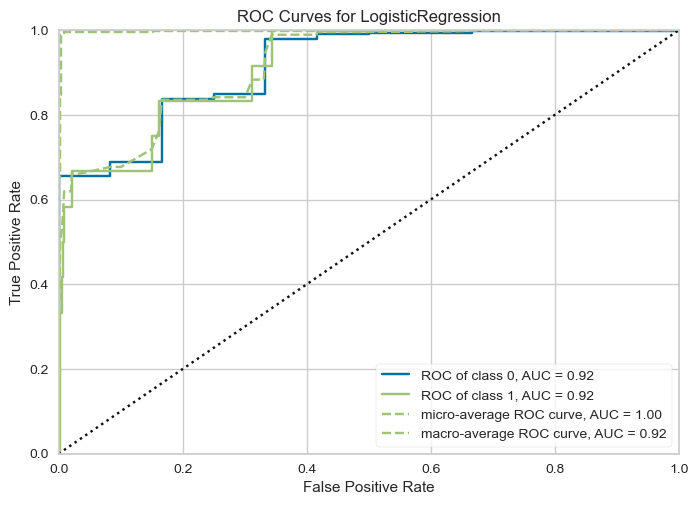

In [67]:
plot_model(down_model,'auc')

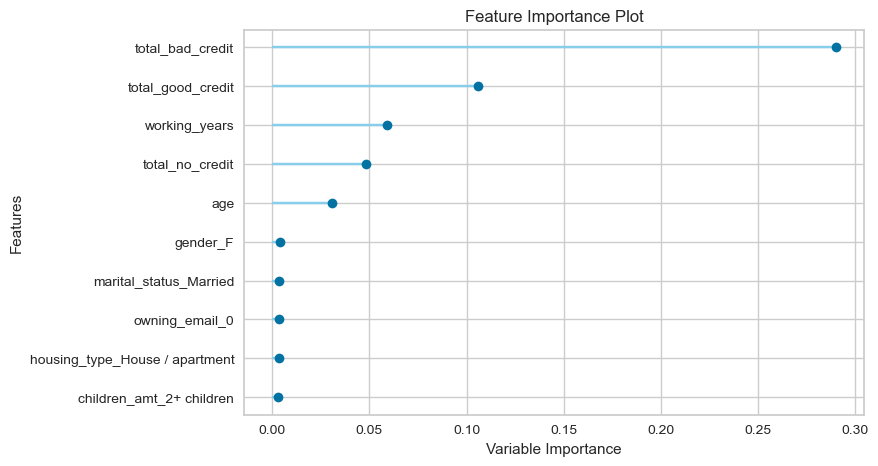

In [69]:
plot_model(down_model, 'feature')

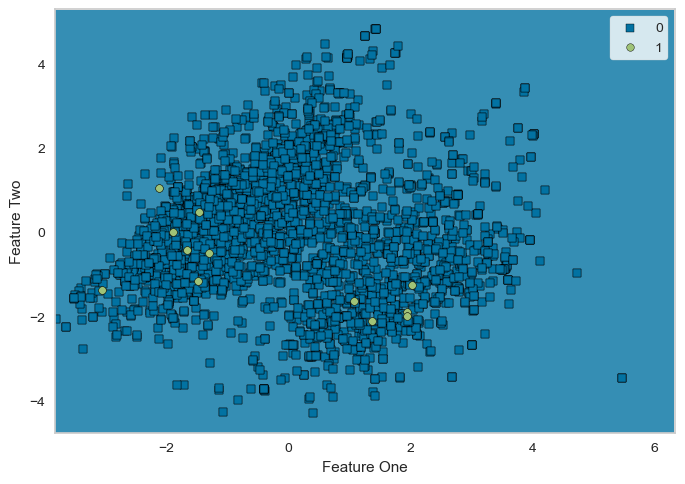

In [68]:
plot_model(down_model,'boundary')

In [64]:
preddf = predict_model(down_model, data=testing_data, raw_score=True, probability_threshold=0.4)
preddf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9941,0.9517,0.6364,0.5385,0.5833,0.5804,0.5825


,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
149282,5008842,M,0,1,1 children,405000.0,Higher education,Married,House / apartment,32,...,0,0,Managers,0,9,0,0,0,0.9269,0.0731
241284,5008858,F,1,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,43,...,0,0,Laborers,0,11,0,0,0,0.9563,0.0437
373341,5008874,F,0,1,2+ children,126000.0,Higher education,Married,House / apartment,34,...,0,1,Managers,0,46,0,0,0,0.9981,0.0019
284401,5008933,F,0,1,No children,297000.0,Secondary / secondary special,Single / not married,Rented apartment,42,...,0,0,Laborers,0,6,0,0,0,0.9325,0.0675
20411,5008943,F,0,0,No children,157500.0,Higher education,Married,House / apartment,37,...,1,0,High skill tech staff,0,0,0,15,0,0.9407,0.0593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44266,5150330,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,6,0,0,0,0.8557,0.1443
194565,5150332,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,20,1,0,0,0.9514,0.0486
381755,5150356,F,0,1,No children,175500.0,Higher education,Married,House / apartment,41,...,1,0,Managers,0,18,0,1,0,0.9764,0.0236
203333,5150389,F,1,1,1 children,315000.0,Secondary / secondary special,Married,Municipal apartment,44,...,0,0,Medicine staff,0,9,0,18,0,0.9906,0.0094


In [65]:
wrong_pred_df = preddf[preddf.risk_user!=preddf.Label]
wrong_pred_df

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
279407,5010868,M,1,1,1 children,450000.0,Secondary / secondary special,Married,House / apartment,49,...,1,1,Core staff,1,10,7,0,0,0.7166,0.2834
297590,5023963,M,0,1,2+ children,90000.0,Secondary / secondary special,Married,House / apartment,34,...,0,0,Core staff,0,5,19,24,1,0.0795,0.9205
17337,5033886,M,0,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,24,...,0,0,Low-skill Laborers,0,3,6,1,1,0.3858,0.6142
446924,5047662,F,0,1,1 children,67500.0,Secondary / secondary special,Married,House / apartment,51,...,0,0,Accountants,0,6,18,11,1,0.1472,0.8528
425934,5061467,M,1,1,No children,90000.0,Secondary / secondary special,Married,House / apartment,32,...,1,0,Laborers,0,3,15,0,1,0.0612,0.9388
419587,5061650,M,0,1,1 children,157500.0,Incomplete higher,Married,House / apartment,24,...,0,0,Core staff,0,8,7,0,1,0.4810,0.5190
196613,5115611,F,0,1,No children,202500.0,Secondary / secondary special,Single / not married,House / apartment,39,...,0,0,Core staff,1,3,2,0,0,0.8363,0.1637
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.9641,0.0359
20724,5125763,M,1,0,1 children,135000.0,Secondary / secondary special,Single / not married,House / apartment,35,...,1,0,Laborers,1,1,2,2,0,0.7395,0.2605
339625,5135483,M,0,1,No children,135000.0,Higher education,Single / not married,Municipal apartment,29,...,0,0,Core staff,0,5,5,0,1,0.5922,0.4078


In [66]:
wrong_pred_df[wrong_pred_df.Label==0]

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
279407,5010868,M,1,1,1 children,450000.0,Secondary / secondary special,Married,House / apartment,49,...,1,1,Core staff,1,10,7,0,0,0.7166,0.2834
196613,5115611,F,0,1,No children,202500.0,Secondary / secondary special,Single / not married,House / apartment,39,...,0,0,Core staff,1,3,2,0,0,0.8363,0.1637
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.9641,0.0359
20724,5125763,M,1,0,1 children,135000.0,Secondary / secondary special,Single / not married,House / apartment,35,...,1,0,Laborers,1,1,2,2,0,0.7395,0.2605


## Wie kommt PYCARET auf die Feature Importances?

Theorie: Precision/recall Kurve

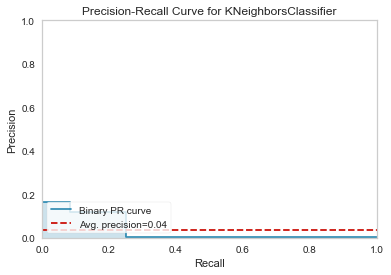

In [21]:
plot_model(best_model_with_downsampling, plot = 'pr')

theorie: Learning curve.

Notiz: generell sieht man hier, das das Model anfang erst underfittet bzw unfähig ist mit der Komplesitöt im Datensatz klarzukommen.

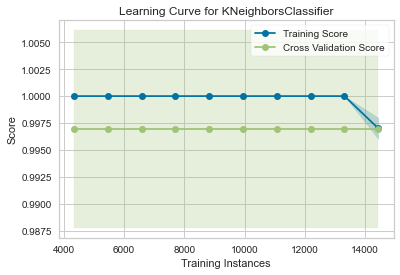

In [22]:
plot_model(best_model_with_downsampling, plot = 'learning')

## Anderer Ansatz

Es ist auffällig, wie die Accuracy von den vorgeschlagenen Modellen sowohl mithilfe von Oversampling als auch downsampling aus Pycaret so hoch ist. Die Vermutung ist, dass eine 100-prozentige Genauigkeit erreicht wurden ist, indem das Modell einfach alle Nullen in diesem speziellen Fall im Datensatz vorhergesagt haben. 



In [51]:
train=pd.read_csv('Application_Data.csv',sep=',').sample(frac=1.0, random_state=0)
target = 'risk_user'
modeltype = 'Classification'

In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy of Naive model = %0.0f%%' %(100*accuracy_score(cca_for_test[target], np.ones(cca_for_test[target].shape[0]))))

Accuracy of Naive model = 0%


In [70]:
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy of Naive model = %0.0f%%' %(100*balanced_accuracy_score(cca_for_test[target], np.ones(cca_for_test[target].shape[0]))))

Balanced Accuracy of Naive model = 50%


In [71]:
cca_for_test[target].value_counts()

0    25062
1       72
Name: risk_user, dtype: int64

In [52]:
## First we will check for and remove ID variables
nunique_train=cca_for_test.nunique().reset_index()
idvars = nunique_train[(nunique_train[0]==len(cca_for_test)) | (nunique_train[0]==0) | (nunique_train[0]==1) ]['index'].tolist()
idvars

['applicant_ID']

In [74]:
if isinstance(target, str):
    preds = [x for x in list(cca_for_test) if x not in idvars+[target]]
else:
    preds = [x for x in list(cca_for_test) if x not in idvars+target]
len(preds)

17

In [75]:
from sklearn.model_selection import train_test_split
seed = 0
test_size = 0.2
X_train = cca_for_test[preds]
y_train = cca_for_test[target]
if modeltype =='Regression':
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)
else:
    try:
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed,shuffle=True, stratify=y)
    except:
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)
X_train.shape, X_test.shape


((20107, 17), (5027, 17))

Folgende Scritte sind:
- alle Objektvariablen in numerische umzmwandeln
- Ein hochgradig abgestimmtes Modell aufbauen, um Ungleichgewichte zu erkennen und entsprechend zu handeln.

Hier bei verwenden wir in diesem Projekt die Featurewiz unddie lazytransform-Bibliothek.

In [55]:
lazy = LazyTransformer(transform_target=False, encoders='label', 
                       combine_rare=False, verbose=2)
#lazy

In [56]:
X_train, y_train = lazy.fit_transform(X_train, y_train)

#### Single_Label Binary_Classification problem ####
Shape of dataset: (20107, 17). Now we classify variables into different types...
    Returning dictionary for variable types with following keys:
                        continuous_vars = 1, int_vars = 8, 
                        discrete_string_vars = 0, nlp_vars = 0,
                        date_vars = 0, time_deltas = 0,
                        categorical_vars = 8, date_zones = 0
    no date time variables detected in this dataset
Using My_LabelEncoder() and My_LabelEncoder() as encoders
    ### there is no scaler specified ###
Check the pipeline creation statement for errors (if any):
	make_column_transformer((lep_one, catvars[0]),(lep_one, catvars[1]),(lep_one, catvars[2]),(lep_one, catvars[3]),(lep_one, catvars[4]),(lep_one, catvars[5]),(lep_one, catvars[6]),(lep_one, catvars[7]),(imp, intvars),(imp, floatvars),    remainder=remainder)
    no other vars left in dataset to transform...
Time taken to define data pipeline = 1 sec

In [57]:
X_test = lazy.transform(X_test)

    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (5027, 17)


Nun sind alle kategorialen Variablen in numerische umgewandelt, im folgenden Schritt wird einen brandneuen Klassifikator von Featurewiz namens SuloClassifier für diesen unausgeglichenen Datensatz ausprobieren

In [58]:
spe = SuloClassifier(base_estimator=None, n_estimators=None, 
                     pipeline=True, weights=False, 
                     imbalanced=True, verbose=1)

In [59]:
spe.fit(X_train, y_train)

Input data shapes: X = (20107, 17), y = (20107,)
No GPU available on this device. Using CPU for lightgbm and others.
       Class  -> Counts -> Percent
           0:   20053  ->   99.7%
           1:      54  ->    0.3%
    Imbalanced classes of y = 1
    Number of estimators used in SuloClassifier = 12
    Selecting Self Paced ensemble classifier as base estimator...
No HPT tuning performed since base estimator is given by input...
Bal accu 83%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3340
           1       0.16      0.67      0.26        12

    accuracy                           0.99      3352
   macro avg       0.58      0.83      0.63      3352
weighted avg       1.00      0.99      0.99      3352

final average accuracy score = 0.83
    Fold 1: Average OOF Score (higher is better): 0.827
Bal accu 93%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3342
         

SuloClassifier(base_estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('numeric',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=True)),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                Index(['gender', 'owning_car', 'owning_property', 'children_amt',
       'education_level', 'marital_status', 'housing_type', 'job', 'age',
       'working_years', 'owning_work_...
                                                                                                               sparse=False))]),
                                                                                Index([], dtype='object')),
                                                                               ('categorical_high',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=True,
                                                                                                               fill_value='missing',
                                                                                                               strategy='constant')),
                                                                                                ('encoding',
                                                                                                 LabelEncoder())]),
                                                                                Index([], dtype='object'))])),
                                              ('model',
                                               SelfPacedEnsembleClassifier(n_jobs=-1,
                                                                           random_state=RandomState(MT19937) at 0x2B71D033040))]),
               imbalanced=True, n_estimators=6, verbose=1)

In [33]:
spe.plot_pipeline()

SuloClassifier(base_estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('numeric',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=True)),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                Index(['gender', 'owning_car', 'owning_property', 'children_amt',
       'education_level', 'marital_status', 'housing_type', 'job', 'age',
       'working_years', 'owning_work_...
                                                                                                               sparse=False))]),
                                                                                Index([], dtype='object')),
                                                                               ('categorical_high',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=True,
                                                                                                               fill_value='missing',
                                                                                                               strategy='constant')),
                                                                                                ('encoding',
                                                                                                 LabelEncoder())]),
                                                                                Index([], dtype='object'))])),
                                              ('model',
                                               SelfPacedEnsembleClassifier(n_jobs=-1,
                                                                           random_state=RandomState(MT19937) at 0x178DA377740))]),
               imbalanced=True, n_estimators=6, verbose=1)

Nun wird das Modell anhand eines stillgelegten Datensatzes getestet, den das Modell noch nie gesehen hat. Dafür wurde hier in diesen Ansatz 20% bei Seite gelegt

In [60]:
y_preds = spe.predict(X_test)
len(y_preds)
y_preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y_probas = spe.predict_proba(X_test)
y_probas.round()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

354658    0
82782     0
218065    0
263463    0
137602    0
         ..
12375     0
436986    0
211765    0
288351    0
133982    0
Name: risk_user, Length: 5027, dtype: int64

In [68]:
print_sulo_accuracy(y_test, np.round(abs(y_preds)), y_probas.round())

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

## Literaturverzeichnis

- [1] https://pestleanalysis.com/descriptive-analysis/#What_Is_Descriptive_Analysis
- [2] https://machinelearningmastery.com/what-is-imbalanced-classification/
- [3] https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html
